In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, losses, optimizers
import numpy as np
from PIL import Image


In [2]:

# Define the generator model
def generator_model():
    inputs = layers.Input(shape=(height, width, channels))
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
    # Add more convolutional layers
    outputs = layers.Conv2D(channels, kernel_size=3, strides=1, padding='same', activation='tanh')(x)
    return Model(inputs, outputs)

# Define the discriminator model
def discriminator_model():
    inputs = layers.Input(shape=(height, width, channels))
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
    # Add more convolutional layers
    outputs = layers.Conv2D(1, kernel_size=3, strides=1, padding='same', activation='sigmoid')(x)
    return Model(inputs, outputs)


In [3]:
# Define the generator loss
def generator_loss(fake_output, target_output, generated_output):
    gen_loss = losses.BinaryCrossentropy()(fake_output, tf.ones_like(fake_output))  # Adversarial loss
    content_loss = losses.MeanAbsoluteError()(target_output, generated_output)  # Content loss
    return gen_loss + content_loss

# Define the discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = losses.BinaryCrossentropy()(real_output, tf.ones_like(real_output))  # Loss for real images
    fake_loss = losses.BinaryCrossentropy()(fake_output, tf.zeros_like(fake_output))  # Loss for fake images
    return real_loss + fake_loss


In [4]:
# Define the generator model
def generator_model():
    inputs = layers.Input(shape=(height, width, channels))
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
    # Add more convolutional layers
    outputs = layers.Conv2D(channels, kernel_size=3, strides=1, padding='same', activation='tanh')(x)
    return Model(inputs, outputs)

# Define the discriminator model
def discriminator_model():
    inputs = layers.Input(shape=(height, width, channels))
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
    # Add more convolutional layers
    outputs = layers.Conv2D(1, kernel_size=3, strides=1, padding='same', activation='sigmoid')(x)
    return Model(inputs, outputs)

# Define the generator loss
def generator_loss(fake_output, target_output, generated_output):
    gen_loss = losses.BinaryCrossentropy()(fake_output, tf.ones_like(fake_output))  # Adversarial loss
    content_loss = losses.MeanAbsoluteError()(target_output, generated_output)  # Content loss
    return gen_loss + content_loss

# Define the discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = losses.BinaryCrossentropy()(real_output, tf.ones_like(real_output))  # Loss for real images
    fake_loss = losses.BinaryCrossentropy()(fake_output, tf.zeros_like(fake_output))  # Loss for fake images
    return real_loss + fake_loss

# Define the training step
@tf.function
def train_step(input_image_real, input_image_fake):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image_fake = generator(input_image_fake, training=True)

        real_output = discriminator(input_image_real, training=True)
        fake_output = discriminator(generated_image_fake, training=True)

        gen_loss = generator_loss(fake_output, input_image_real, generated_image_fake)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Define hyperparameters
height, width, channels = 64, 64, 3  # Dimensions of input images
epochs = 10000
learning_rate = 0.0002

# Load the two images
image_path_good_lighting = 'good_lighting.jpg'
image_path_bad_lighting = 'bad_lighting.jpg'
image_good_lighting = tf.expand_dims(tf.image.decode_image(tf.io.read_file(image_path_good_lighting)), axis=0)
image_bad_lighting = tf.expand_dims(tf.image.decode_image(tf.io.read_file(image_path_bad_lighting)), axis=0)

# Resize images to the desired dimensions
target_height, target_width = 64, 64
image_good_lighting = tf.image.resize(image_good_lighting, (target_height, target_width))
image_bad_lighting = tf.image.resize(image_bad_lighting, (target_height, target_width))

# Normalize pixel values to range [-1, 1]
image_good_lighting = (tf.cast(image_good_lighting, tf.float32) / 127.5) - 1.0
image_bad_lighting = (tf.cast(image_bad_lighting, tf.float32) / 127.5) - 1.0

# Create generator and discriminator models
generator = generator_model()
discriminator = discriminator_model()

# Define optimizers
generator_optimizer = optimizers.Adam(learning_rate)
discriminator_optimizer = optimizers.Adam(learning_rate)

# Training loop
for epoch in range(epochs):
    train_step(image_good_lighting, image_bad_lighting)
    
    # Display training progress
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}')

# Generate an improved image
generated_image_fake = generator(image_bad_lighting, training=False)

# Visualize the result and evaluate the model as needed



Epoch 0/10000
Epoch 10/10000
Epoch 20/10000
Epoch 30/10000
Epoch 40/10000
Epoch 50/10000
Epoch 60/10000
Epoch 70/10000
Epoch 80/10000
Epoch 90/10000
Epoch 100/10000
Epoch 110/10000
Epoch 120/10000
Epoch 130/10000
Epoch 140/10000
Epoch 150/10000
Epoch 160/10000
Epoch 170/10000
Epoch 180/10000
Epoch 190/10000
Epoch 200/10000
Epoch 210/10000
Epoch 220/10000
Epoch 230/10000
Epoch 240/10000
Epoch 250/10000
Epoch 260/10000
Epoch 270/10000
Epoch 280/10000
Epoch 290/10000
Epoch 300/10000
Epoch 310/10000
Epoch 320/10000
Epoch 330/10000
Epoch 340/10000
Epoch 350/10000
Epoch 360/10000
Epoch 370/10000
Epoch 380/10000
Epoch 390/10000
Epoch 400/10000
Epoch 410/10000
Epoch 420/10000
Epoch 430/10000
Epoch 440/10000
Epoch 450/10000
Epoch 460/10000
Epoch 470/10000
Epoch 480/10000
Epoch 490/10000
Epoch 500/10000
Epoch 510/10000
Epoch 520/10000
Epoch 530/10000
Epoch 540/10000
Epoch 550/10000
Epoch 560/10000
Epoch 570/10000
Epoch 580/10000
Epoch 590/10000
Epoch 600/10000
Epoch 610/10000
Epoch 620/10000
Epo

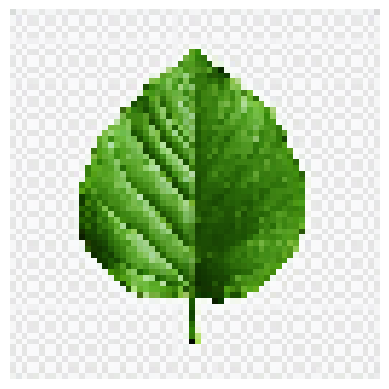

In [5]:
import matplotlib.pyplot as plt
# Generate an improved image
generated_image_fake = generator(image_bad_lighting, training=False)

# Convert the generated image from [-1, 1] range to [0, 1] range for display
generated_image_fake = (generated_image_fake + 1.0) / 2.0

# Display the generated image
plt.imshow(generated_image_fake[0])
plt.axis('off')
plt.show()

In [6]:
def load_images(image_path_good_lighting, image_path_bad_lighting, target_height, target_width):
    # Load and preprocess the real image (good lighting)
    image_good_lighting = Image.open(image_path_good_lighting).resize((target_width, target_height))
    image_good_lighting = np.array(image_good_lighting) / 255.0  # Normalize pixel values to [0, 1]

    # Load and preprocess the fake image (bad lighting)
    image_bad_lighting = Image.open(image_path_bad_lighting).resize((target_width, target_height))
    image_bad_lighting = np.array(image_bad_lighting) / 255.0  # Normalize pixel values to [0, 1]

    return image_good_lighting, image_bad_lighting



In [7]:
image_path_good_lighting = 'good_lighting.jpg'
image_path_bad_lighting = 'bad_lighting.jpg'
target_height = 64
target_width = 64
real_image, fake_image = load_images(image_path_good_lighting, image_path_bad_lighting, target_height, target_width)


In [8]:
# Load and preprocess the dataset
# Assume you have a function load_dataset() to load the dataset and preprocess it
train_dataset = dataset
# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size)

# Define hyperparameters
height, width, channels = 64, 64, 3  # Dimensions of input images
epochs = 100
batch_size = 32
learning_rate = 0.0002
buffer_size = 1000


NameError: name 'dataset' is not defined

In [ ]:

# Create generator and discriminator models
generator = generator_model()
discriminator = discriminator_model()

# Define optimizers
generator_optimizer = optimizers.Adam(learning_rate)
discriminator_optimizer = optimizers.Adam(learning_rate)


In [ ]:
# Training loop
for epoch in range(epochs):
    for batch in train_dataset:
        input_images, target_images = batch
        train_step(input_images, target_images)
    
    # Display training progress
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Generator Loss: {gen_loss.numpy()}, Discriminator Loss: {disc_loss.numpy()}')


In [ ]:
# Generate images with improved lighting
# Assume you have a function generate_images() to generate images with bad lighting
input_images = generate_images()
improved_images = generator(input_images, training=False)
